In [226]:
import pandas as pd
noisysine = pd.read_csv('noisysine.csv')
hydrodynamics = pd.read_csv('hydrodynamics.csv')

**Implement linear and polynomial regression algorithms (for noisysine use the powers from 2 to 5, for hydrodynamics use the power of 2). No regularization.**

In [227]:
import numpy as np
from numpy.linalg import inv

def estimate_coeff(x, y, alpha=0):
    return np.dot(np.dot(inv(np.dot(np.transpose(x), x) + alpha * np.identity(x.shape[1])),
                         np.transpose(x)), y)

In [500]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
def plot_regression_line(x, y_true, y_pred):
    plt.scatter(x[:, 1], y_true, color='m', marker='o')   
    plt.plot(x[:, 1], y_pred, color='g')
    plt.xlabel('Size')
    plt.ylabel('Cost')
    #from sklearn.linear_model import LinearRegression
    #model = LinearRegression().fit(x, y)
    #y_pred_real = model.predict(x)
    #plt.plot(x, y_pred_real, color='b')
    plt.show()

In [502]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
def prepare(df, deg):
    x = df.drop('y', axis=1).values
    x = PolynomialFeatures(deg).fit_transform(x)
    y = df['y'].values
    return x, y

def regression(df, deg=1, alpha=0):
    x, y = prepare(df, deg)
    X_train, X_test, y_train, y_test = train_test_split(x, y)
    b = estimate_coeff(X_train, y_train, alpha)
    y_pred = np.dot(x, np.transpose(b))
    return x, y, y_pred


R2 0.1809878816471211


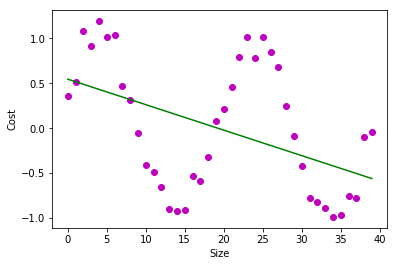

In [503]:
x, y_true, y_pred = regression(noisysine)
print("R2 {}".format(r2_score(y_true, y_pred)))
plot_regression_line(x, y_true, y_pred)

R2 0.18195549185547166


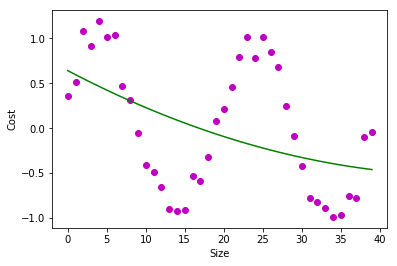

In [504]:
x, y_true, y_pred = regression(noisysine, 2)
print("R2 {}".format(r2_score(y_true, y_pred)))
plot_regression_line(x, y_true, y_pred)

R2 0.2784764677039324


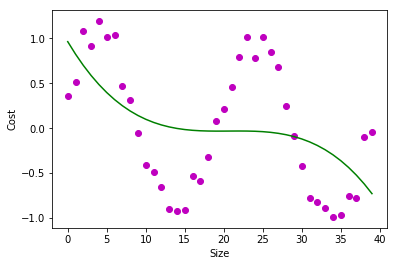

In [505]:
x, y_true, y_pred = regression(noisysine, 3)
print("R2 {}".format(r2_score(y_true, y_pred)))
plot_regression_line(x, y_true, y_pred)

R2 0.316759165937028


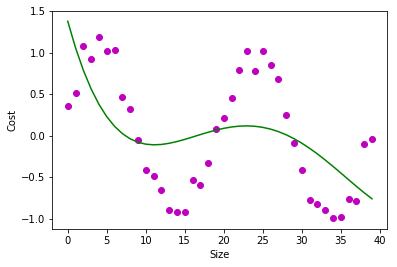

In [233]:
x, y_true, y_pred = regression(noisysine, 4)
print("R2 {}".format(r2_score(y_true, y_pred)))
plot_regression_line(x, y_true, y_pred)

R2 0.8903239115144823


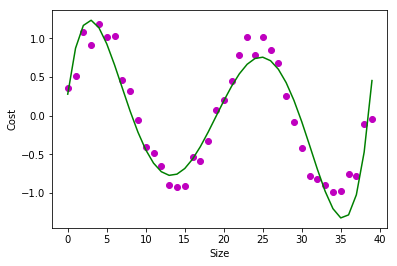

In [506]:
x, y_true, y_pred = regression(noisysine, 5)
print("R2 {}".format(r2_score(y_true, y_pred)))
plot_regression_line(x, y_true, y_pred)

In [507]:
_, y_true, y_pred = regression(hydrodynamics)
print('R2 {}'.format(r2_score(y_true, y_pred)))

R2 0.6548119269968812


In [508]:
_, y_true, y_pred = regression(hydrodynamics, 2)
print('R2 {}'.format(r2_score(y_true, y_pred)))

R2 0.927933933725024


**Implement a ridge regression algorithm and optimize the regularization parameter for every case from task 1).**

In [513]:
from tqdm import tqdm_notebook as tqdm
def best_param(df, deg=1):
    delta = 0.0001
    best_alpha = 0
    best_score = None
    y_pred = None
    x = None
    y_true = None
    for alpha in tqdm(np.arange(0, 1, delta)):
        x, y_true, y_pred_now = regression(df, deg, alpha)
        r2 = r2_score(y_true, y_pred_now)
        if best_score is None or best_score < r2:
            best_score = r2
            y_pred = y_pred_now
            best_alpha = alpha
            best_score = r2
    return x, y_true, y_pred, best_score, best_alpha

In [514]:
def best_param_noisysine(deg):
    x, y_true, y_pred, best_score, best_alpha = best_param(noisysine, deg)
    print('Best R2 score: ', best_score)
    print('Best alpha: ', best_alpha)
    plot_regression_line(x, y_true, y_pred)

Best R2 score:  0.18295671324437168
Best alpha:  0.8741


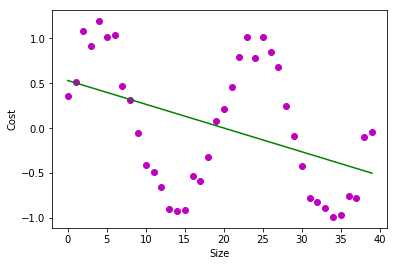

In [515]:
best_param_noisysine(1)

Best R2 score:  0.1856323941263076
Best alpha:  0.12050000000000001


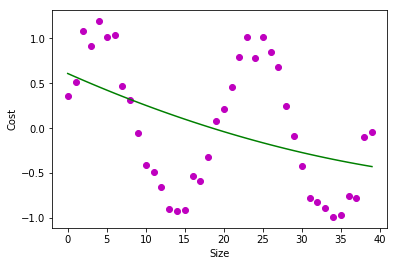

In [516]:
best_param_noisysine(2)

Best R2 score:  0.29942493700917894
Best alpha:  0.08710000000000001


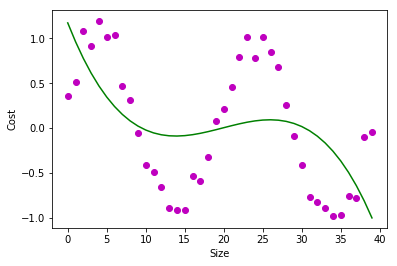

In [517]:
best_param_noisysine(3)

Best R2 score:  0.31522730602143745
Best alpha:  0.6625


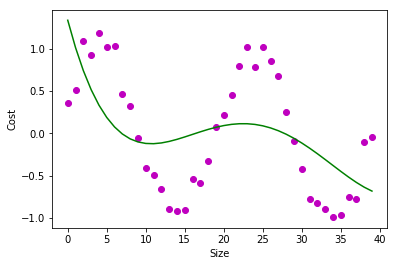

In [518]:
best_param_noisysine(4)


Best R2 score:  0.898263009899109
Best alpha:  0.0


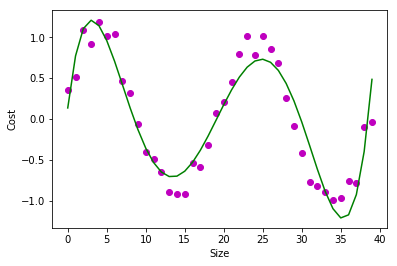

In [252]:
best_param_noisysine(5)

In [519]:
x, y_true, y_pred, best_score, best_alpha = best_param(hydrodynamics)
print('Best R2 score: ', best_score)
print('Best alpha: ', best_alpha)

Best R2 score:  0.6574391419623363
Best alpha:  0.030100000000000002


In [520]:
x, y_true, y_pred, best_score, best_alpha = best_param(hydrodynamics, 2)
print('Best R2 score: ', best_score)
print('Best alpha: ', best_alpha)

Best R2 score:  0.928938314361964
Best alpha:  0.0012000000000000001


**Use the LASSO regression algorithm for every case from task 1) (i.e., from the sklearn library). Output the number of used features.**

Number of used features:  1
R2 0.18295700955112393


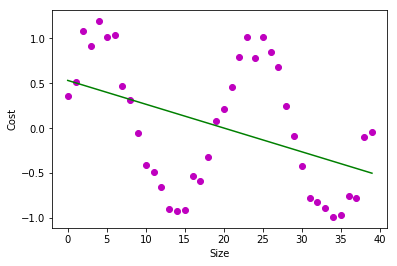

In [521]:
from sklearn.linear_model import Lasso

x, y = prepare(noisysine, 1)
lasso = Lasso(alpha=1e-7, max_iter=1000000)
lasso.fit(x, y)
y_pred = lasso.predict(x)
coeff_used = np.sum(lasso.coef_!=0)
print("Number of used features: ", coeff_used)
print('R2 {}'.format(r2_score(y, y_pred)))
plot_regression_line(x, y, y_pred)

Number of used features:  2
R2 0.1856351782841913


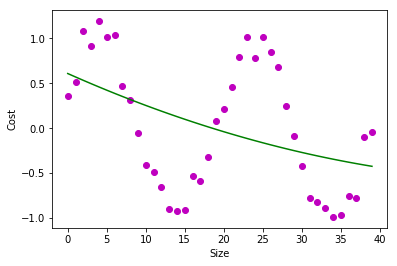

In [522]:
from sklearn.linear_model import Lasso

x, y = prepare(noisysine, 2)
lasso = Lasso(alpha=1e-7, max_iter=1000000)
lasso.fit(x, y)
y_pred = lasso.predict(x)
coeff_used = np.sum(lasso.coef_!=0)
print("Number of used features: ", coeff_used)
print('R2 {}'.format(r2_score(y, y_pred)))
plot_regression_line(x, y, y_pred)

Number of used features:  2
R2 0.1599628241499258


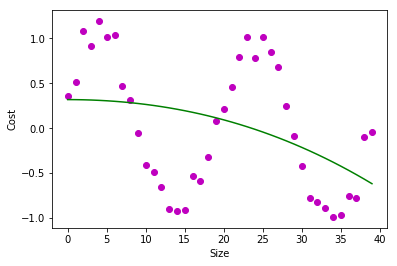

In [469]:
from sklearn.linear_model import Lasso

x, y = prepare(noisysine, 3)
lasso = Lasso()
lasso.fit(x, y)
y_pred = lasso.predict(x)
coeff_used = np.sum(lasso.coef_!=0)
print("Number of used features: ", coeff_used)
print('R2 {}'.format(r2_score(y, y_pred)))
plot_regression_line(x, y, y_pred)

Number of used features:  4
R2 0.3167591659369676


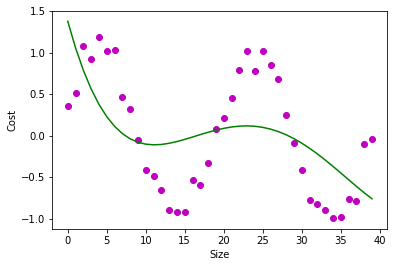

In [523]:
from sklearn.linear_model import Lasso

x, y = prepare(noisysine, 4)
lasso = Lasso(alpha=1e-7, max_iter=1000000)
lasso.fit(x, y)
y_pred = lasso.predict(x)
coeff_used = np.sum(lasso.coef_!=0)
print("Number of used features: ", coeff_used)
print('R2 {}'.format(r2_score(y, y_pred)))
plot_regression_line(x, y, y_pred)

Number of used features:  5
R2 0.898263009898927


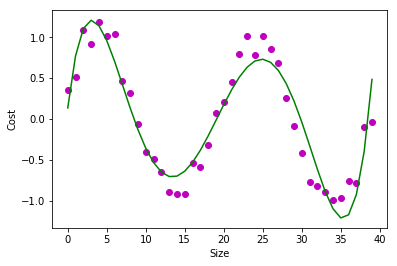

In [525]:
from sklearn.linear_model import Lasso

x, y = prepare(noisysine, 5)
lasso = Lasso(alpha=1e-7, max_iter=1000000000)
lasso.fit(x, y)
y_pred = lasso.predict(x)
coeff_used = np.sum(lasso.coef_!=0)
print("Number of used features: ", coeff_used)
print('R2 {}'.format(r2_score(y, y_pred)))
plot_regression_line(x, y, y_pred)

In [473]:
x, y = prepare(hydrodynamics, 1)
lasso = Lasso()
lasso.fit(x, y)
y_pred = lasso.predict(x)
coeff_used = np.sum(lasso.coef_!=0)
print("Number of used features: ", coeff_used)
print('R2 {}'.format(r2_score(y, y_pred)))

Number of used features:  1
R2 0.2264632023667269


In [474]:
x, y = prepare(hydrodynamics, 2)
lasso = Lasso()
lasso.fit(x, y)
y_pred = lasso.predict(x)
coeff_used = np.sum(lasso.coef_!=0)
print("Number of used features: ", coeff_used)
print('R2 {}'.format(r2_score(y, y_pred)))

Number of used features:  4
R2 0.6334426374958662


In [454]:
tsp = pd.read_csv('tsp.csv')

In [455]:
def tour_len(tour):
    res = 0
    for i in range(1, len(tour)):
        res += np.abs(tour[i][1] - tour[i - 1][1]) + np.abs(tour[i][2] - tour[i - 1][2])
    #print(res)
    return -res


def swap_cities(tour):
    res = []
    for i in range(len(tour)):
        for j in range(i + 1, len(tour)):
            new_permutation = tour.copy()
            new_permutation[i] = tour[j]
            new_permutation[j] = tour[i]
            res.append(new_permutation)
    return res

**Implement a Monte-Carlo search.**

In [479]:
import numpy as np
def monte_carlo(cities, num_of_iterations):
    best, best_score = None, None
    for _ in tqdm(range(num_of_iterations)):
        new_permutation = cities.copy()
        np.random.shuffle(new_permutation)
        score = tour_len(new_permutation)
        if best_score is None or best_score < score:
            best = new_permutation
            best_score = score
    return best, best_score

In [480]:
best, best_score = monte_carlo(tsp.values, 500000)

In [481]:
-best_score

26185

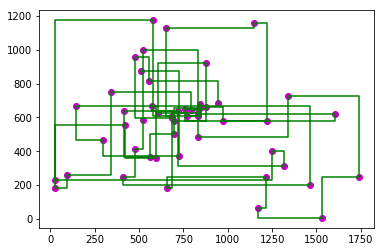

In [482]:
import matplotlib.pyplot as plt
%matplotlib inline
x, y = [], []
for i in range(1, len(best)):
    x.append(best[i - 1][1])
    x.append(best[i][1])
    y.append(best[i - 1][2])
    y.append(best[i - 1][2])
x.append(best[-1][1])
y.append(best[-1][2])

dots_x = [item[1] for item in best]
dots_y = [item[2] for item in best]
plt.scatter(dots_x, dots_y, color='m', marker='o') 
plt.plot(x, y, color='g')

**Implement a random walk search.**

In [488]:
def random_walk(cities):
    used = set()
    path = []
    ind = np.random.choice(len(cities))
    cur = cities[ind]
    path.append(cur)
    used.add(ind)
    while len(path) < len(cities):
        p = []
        indices = []
        for i in range(len(cities)):
            if i in used:
                continue
            p.append(1 / (np.abs(cities[i][1] - cur[1]) + np.abs(cities[i][2] - cur[2])))
            indices.append(i)
        ind = np.random.choice(indices, p=[prob / np.sum(p) for prob in p])
        cur = cities[ind]
        used.add(ind)
        path.append(cur)
    return path
            
    


In [489]:
path = random_walk(tsp.values)

In [490]:
-tour_len(path)

28560

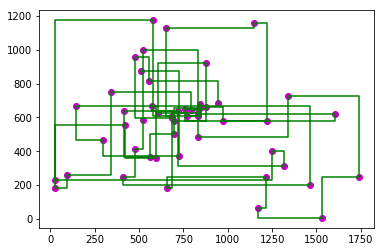

In [491]:
import matplotlib.pyplot as plt
%matplotlib inline
x, y = [], []
for i in range(1, len(best)):
    x.append(best[i - 1][1])
    x.append(best[i][1])
    y.append(best[i - 1][2])
    y.append(best[i - 1][2])
x.append(best[-1][1])
y.append(best[-1][2])

dots_x = [item[1] for item in best]
dots_y = [item[2] for item in best]
plt.scatter(dots_x, dots_y, color='m', marker='o') 
plt.plot(x, y, color='g')

**Implement a hill climb algorithm.**

In [ ]:
def hillclimb(
    init_function,
    move_operator,
    objective_function,
    max_evaluations):
    best = init_function()
    best_score = objective_function(best)  
    
    for i in range(max_evaluations):
        # examine moves around our current position
        move_made = False
        for next_step in move_operator(best): 
            next_score = objective_function(next_step)
            if next_score > best_score:
                best = next_step
                best_score = next_score
                move_made = True
                break
            
        if not move_made:
            return num_evaluations, best_score, best

In [456]:
import random

num_evaluations, best_score, best = hillclimb(init_function = lambda : tsp.sample(frac=1).reset_index(drop=True).values.copy(),
    move_operator = swap_cities,
    objective_function = tour_len,
    max_evaluations = 100000)

In [457]:
-best_score

12705

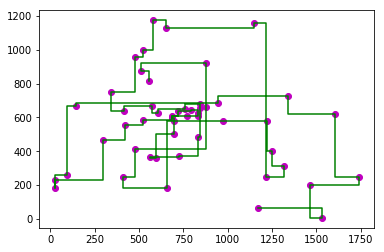

In [458]:
import matplotlib.pyplot as plt
%matplotlib inline
x, y = [], []
for i in range(1, len(best)):
    x.append(best[i - 1][1])
    x.append(best[i][1])
    y.append(best[i - 1][2])
    y.append(best[i - 1][2])
x.append(best[-1][1])
y.append(best[-1][2])
plt.scatter(best[:, 1], best[:, 2], color='m', marker='o') 
plt.plot(x, y, color='g')

**Implement a simulated annealing algorithm.**

In [399]:
import random

class ObjectiveFunction:
    def __init__(self,objective_function):
        self.objective_function=objective_function
        self.best = None
        self.best_score = None
    
    def __call__(self,solution):
        score = self.objective_function(solution)
        if self.best is None or score > self.best_score:
            self.best_score = score
            self.best = solution
        return score


def P(prev_score, next_score, temperature):
    if next_score > prev_score:
        return 1.0
    else:
        return np.exp(-np.abs(next_score - prev_score) / temperature)


def anneal(init_function,
           move_operator,
           objective_function,
           max_evaluations,
           start_temp,
           alpha):
    
    # wrap the objective function (so we record the best)
    objective_function = ObjectiveFunction(objective_function)
    temperature = start_temp
    current = init_function()
    current_score = objective_function(current)
    
    used = set()
    for i in tqdm(range(max_evaluations)):
        for next_step in move_operator(current):
            if next_step.tobytes() in used:
                continue
            used.add(next_step.tobytes())
            next_score = objective_function(next_step)
            p = P(current_score, next_score, temperature)
            if random.random() < p:
                #print(p, objective_function.best_score, next_score)
                current = next_step
                current_score = next_score
                break
        temperature *= alpha
    
    best_score = objective_function.best_score
    best = objective_function.best

    return num_evaluations,best_score,best

In [492]:
import random

num_evaluations, best_score, best = anneal(init_function = lambda : tsp.sample(frac=1).reset_index(drop=True).values,
    move_operator = swap_cities,
    objective_function = tour_len,
    max_evaluations = 100000, start_temp = 10, alpha = 0.999995)

In [406]:
-best_score

-11975

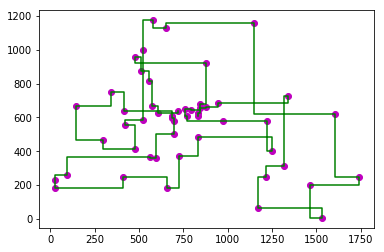

In [407]:
import matplotlib.pyplot as plt
%matplotlib inline
x, y = [], []
for i in range(1, len(best)):
    x.append(best[i - 1][1])
    x.append(best[i][1])
    y.append(best[i - 1][2])
    y.append(best[i - 1][2])
x.append(best[-1][1])
y.append(best[-1][2])
plt.scatter(best[:, 1], best[:, 2], color='m', marker='o') 
plt.plot(x, y, color='g')

**Implement a genetic algorithm.**

In [432]:
import random
import operator

def create_route(city_list):
    route = city_list.copy()
    np.random.shuffle(route)
    return route

def initial_population(pop_size, city_list):
    population = []

    for i in range(pop_size):
        population.append(create_route(city_list))
    return population

def rank_routes(population):
    res = {}
    for i in range(len(population)):
        res[i] = tour_len(population[i])
    return sorted(res.items(), key = operator.itemgetter(1), reverse = True)

def selection(pop_ranked, elite_size):
    selection_results = []
    df = pd.DataFrame(np.array(pop_ranked), columns=['Index', 'Fitness'])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100 * df.cum_sum / df.Fitness.sum()
    
    for i in range(elite_size):
        selection_results.append(pop_ranked[i][0])
    for i in range(len(pop_ranked) - elite_size):
        pick = 100 * random.random()
        for i in range(len(pop_ranked)):
            if pick <= df.iat[i,3]:
                selection_results.append(pop_ranked[i][0])
                break
    return selection_results

In [433]:
def mating_pool(population, selection_results):
    matingpool = []
    for i in range(len(selection_results)):
        index = selection_results[i]
        matingpool.append(population[index])
    return matingpool

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    start_gene = min(geneA, geneB)
    end_gene = max(geneA, geneB)
    child_set = set()
    for i in range(start_gene, end_gene):
        childP1.append(parent1[i])
        child_set.add(parent1[i][0])
        
    childP2 = [item for item in parent2 if item[0] not in child_set]
    child = childP1 + childP2
    return child

def breed_population(matingpool, elite_size):
    children = []
    length = len(matingpool) - elite_size
    pool = random.sample(matingpool, len(matingpool))

    for i in range(elite_size):
        children.append(matingpool[i])
    
    for i in range(length):
        child = breed(pool[i], pool[len(matingpool) - i - 1])
        children.append(child)
    return children

def mutate(individual, mutation_rate):
    for swapped in range(len(individual)):
        if(random.random() < mutation_rate):
            swap_with = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swap_with]
            
            individual[swapped] = city2
            individual[swap_with] = city1
    return individual

def mutate_population(population, mutation_rate):
    mutated_pop = []
    
    for ind in range(len(population)):
        mutated_ind = mutate(population[ind], mutation_rate)
        mutated_pop.append(mutated_ind)
    return mutated_pop

In [441]:
def next_generation(current_gen, elite_size, mutation_rate):
    pop_ranked = rank_routes(current_gen)
    selection_results = selection(pop_ranked, elite_size)
    matingpool = mating_pool(current_gen, selection_results)
    children = breed_population(matingpool, elite_size)
    next_generation = mutate_population(children, mutation_rate)
    return next_generation

def genetic_algorithm(population, pop_size, elite_size, mutation_rate, generations):
    pop = initial_population(pop_size, population)
    print("Initial distance: ", -rank_routes(pop)[0][1])
    
    for i in tqdm(range(generations)):
        pop = next_generation(pop, elite_size, mutation_rate)
    
    print("Final distance: ", -rank_routes(pop)[0][1])
    best_route_index = rank_routes(pop)[0][0]
    best_route = pop[best_route_index]
    return best_route



In [460]:
best = genetic_algorithm(population=tsp.values, pop_size=100, elite_size=20, mutation_rate=0.01, generations=15000)

Initial distance:  31015


Final distance:  17755


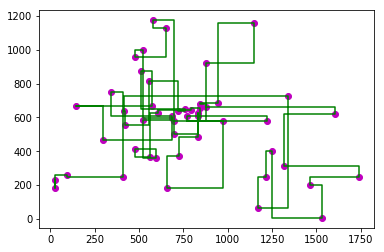

In [461]:
import matplotlib.pyplot as plt
%matplotlib inline
x, y = [], []
for i in range(1, len(best)):
    x.append(best[i - 1][1])
    x.append(best[i][1])
    y.append(best[i - 1][2])
    y.append(best[i - 1][2])
x.append(best[-1][1])
y.append(best[-1][2])

dots_x = [item[1] for item in best]
dots_y = [item[2] for item in best]
plt.scatter(dots_x, dots_y, color='m', marker='o') 
plt.plot(x, y, color='g')